In [20]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
num_samples, img_features_grid = 100 , 256
num_user_feature = 10 + 2

xtrain = np.random.rand(num_samples, 
                        img_features_grid)

ytrain = np.random.rand(num_samples, 
                        num_user_feature)

xtest = np.random.rand(num_samples, 
                        img_features_grid)

ytest = np.random.rand(num_samples, 
                        num_user_feature)

Model: "USER_PREFERENCE_REGRESSION"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256)]             0         
                                                                 
 dense1 (Dense)              (None, 128)               32896     
                                                                 
 dense2 (Dense)              (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 final_layer (Dense)         (None, 12)                780       
                                                                 
Total params: 41,932
Trainable params: 41,932
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
4/4 - 1s - loss: 0.1619 - 

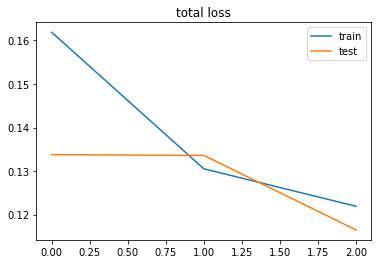

INFO:tensorflow:Assets written to: C:\Users\ospite\Documents\user-simulation-regression\notebooks\model\assets


In [31]:
#model dimensions, hyperparams, loss
hidden_dim1 = 128
hidden_dim2 = 64
drop_out = 0.75
optimizer = 'adam'
loss = 'huber'
batch_size = 32 
epochs =  3


#define model
input_user = layers.Input(shape=(xtrain.shape[1]), name='input_layer')

dense1 = layers.Dense(hidden_dim1, activation='relu', name='dense1')(input_user) #(dense1)
dense2 = layers.Dense(hidden_dim2, activation='relu',  name='dense2')(dense1)     #(dense2)
dpout = layers.Dropout(drop_out, name='dropout')(dense2)
output = layers.Dense(num_user_feature, activation='relu', name = 'final_layer')(dpout)






#INITIALIZE THE MODEL AND COMPILE IO 
model = Model(inputs  = input_user, 
              outputs = [output],
              name = 'USER_PREFERENCE_REGRESSION')


model.compile(loss={'final_layer': 'huber', 
                   },
              #loss_weights={},
              optimizer=optimizer
              )

#MODEL SUMMARY PRINT
model.summary()


#Fit Data 
history = model.fit(xtrain, {'final_layer': ytrain},

                    validation_data= (xtest, 
                                      {'final_layer': ytest}),

                    
                    batch_size=batch_size,
                    epochs=epochs,

                    verbose=2,
                    shuffle=True
                    )


plt.plot(history.history['loss'],     label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('total loss')
plt.show()
name = 'model'
name_m = os.getcwd() + '\\'+ name
model.save(name_m)

In [26]:
#tf.keras.utils.plot_model(model,
#                          to_file="model.png",
#                          show_shapes=True,
#                          rankdir="TB")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [30]:
def fit_model(xtrain, ytrain, xtest, ytest,
              hidden_dim1 = 128,hidden_dim2 = 64,drop_out = 0.75,optimizer = 'adam',loss = 'huber', 
              batch_size = 32 ,epochs=3, 
              PLOT=True, name = 'model'):
    #define model
    input_user = layers.Input(shape=(xtrain.shape[1]), name='input_layer')

    dense1 = layers.Dense(hidden_dim1, activation='relu', name='dense1')(input_user) #(dense1)
    dense2 = layers.Dense(hidden_dim2, activation='relu',  name='dense2')(dense1)     #(dense2)
    dpout = layers.Dropout(drop_out, name='dropout')(dense2)
    output = layers.Dense(num_user_feature, activation='relu', name = 'final_layer')(dpout)



    #INITIALIZE THE MODEL AND COMPILE IO 
    model = Model(inputs  = input_user, 
                  outputs = [output],
                  name = 'USER_PREFERENCE_REGRESSION')


    model.compile(loss={'final_layer': 'huber', 
                       },
                  #loss_weights={},
                  optimizer=optimizer
                  )

    #MODEL SUMMARY PRINT
    model.summary()


    #Fit Data 
    history = model.fit(xtrain, {'final_layer': ytrain},

                        validation_data= (xtest, 
                                          {'final_layer': ytest}),


                        batch_size=batch_size,
                        epochs=epochs,

                        verbose=2,
                        shuffle=True
                        )
    if PLOT == True:
        plt.plot(history.history['loss'],     label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.title('total loss')
        plt.show()
    if save_model == True:
        name_m = os.getcwd() + '\\'+ name
        model.save(name_m)
    return model, history

In [ ]:
def make_predictions(model_path, samples_to_be_predicted, 
                    batch_size=32):
    
    # Load the model
    model = keras.models.load_model(filepath, compile = True)
    
    #make predictions
    predictions = model.predict(samples_to_be_predicted)
    return predictions